<a href="https://colab.research.google.com/github/Eeman1113/Enahncing-Images-using-AI/blob/main/ESRGAN_Faster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown # **1) Download required Libraries**
# # Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
# Download the pre-trained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models
%cd ..

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 583, done.
remote: Total 583 (delta 0), reused 0 (delta 0), pack-reused 583
Receiving objects: 100% (583/583), 4.97 MiB | 18.58 MiB/s, done.
Resolving deltas: 100% (299/299), done.
/content/Real-ESRGAN
     |████████████████████████████████| 161 kB 5.3 MB/s 
     |████████████████████████████████| 5.8 MB 40.3 MB/s 
     |████████████████████████████████| 190 kB 42.8 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.5-py3-none-any.whl size=194483 sha256=edc302385616f6e8bd86f51c1374b1b6e9d3f011286cf79e249b697a4a1865b5
  Stored in directory: /root/.cache/pip/wheels/74/1b/d0/8659cf028233dd1e3bf282271009fbf037dfc4ab761f32a032
Successfully built basicsr
     |████████████████████████████████| 59 kB 3.0 MB/s 
     |████████████████████████████████| 177 kB 10.6 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=0be705722ad65b4e6563420468e4007b090a273f7ad7d7ef8a6f7a62b971f676
  Stored i

running develop
running egg_info
creating realesrgan.egg-info
writing realesrgan.egg-info/PKG-INFO
writing dependency_links to realesrgan.egg-info/dependency_links.txt
writing requirements to realesrgan.egg-info/requires.txt
writing top-level names to realesrgan.egg-info/top_level.txt
writing manifest file 'realesrgan.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'realesrgan.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/realesrgan.egg-link (link to .)
Adding realesrgan 0.2.4.0 to easy-install.pth file

Installed /content/Real-ESRGAN
Processing dependencies for realesrgan==0.2.4.0
Searching for tqdm==4.63.0
Best match: tqdm 4.63.0
Adding tqdm 4.63.0 to easy-install.pth file
Installing tqdm script to /usr/local/bin

Using /usr/local/lib/python3.7/dist-packages
Searching for torchvision==0.11.1+cu111
Best match: torchvision 0.11.1+cu111
Adding torchvision 0.11.1+cu111 to easy-inst

In [ ]:
#@markdown # **2) Upload your images**
%cd Real-ESRGAN
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)
%cd ..

/content/Real-ESRGAN


Saving Screenshot 2022-04-04 at 7.44.37 PM.png to Screenshot 2022-04-04 at 7.44.37 PM.png
move Screenshot 2022-04-04 at 7.44.37 PM.png to upload/Screenshot 2022-04-04 at 7.44.37 PM.png
/content


In [ ]:
#@markdown # **3) Run ERSGAN on Uploaded Image**
%cd Real-ESRGAN
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 4 --half --face_enhance
# !python inference_realesrgan.py --model_path experiments/pretrained_models/RealESRGAN_x4plus.pth --input upload --netscale 4 --outscale 3.5 --half --face_enhance
%cd ..

/content/Real-ESRGAN
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/python3.7/dist-packages/facexlib/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:00<00:00, 158MB/s] 
Downloading: "https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth" to /usr/local/lib/python3.7/dist-packages/gfpgan/weights/GFPGANv1.3.pth

100% 332M/332M [00:04<00:00, 79.0MB/s]
Testing 0 Screenshot 2022-04-04 at 7.44.37 PM
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_fact

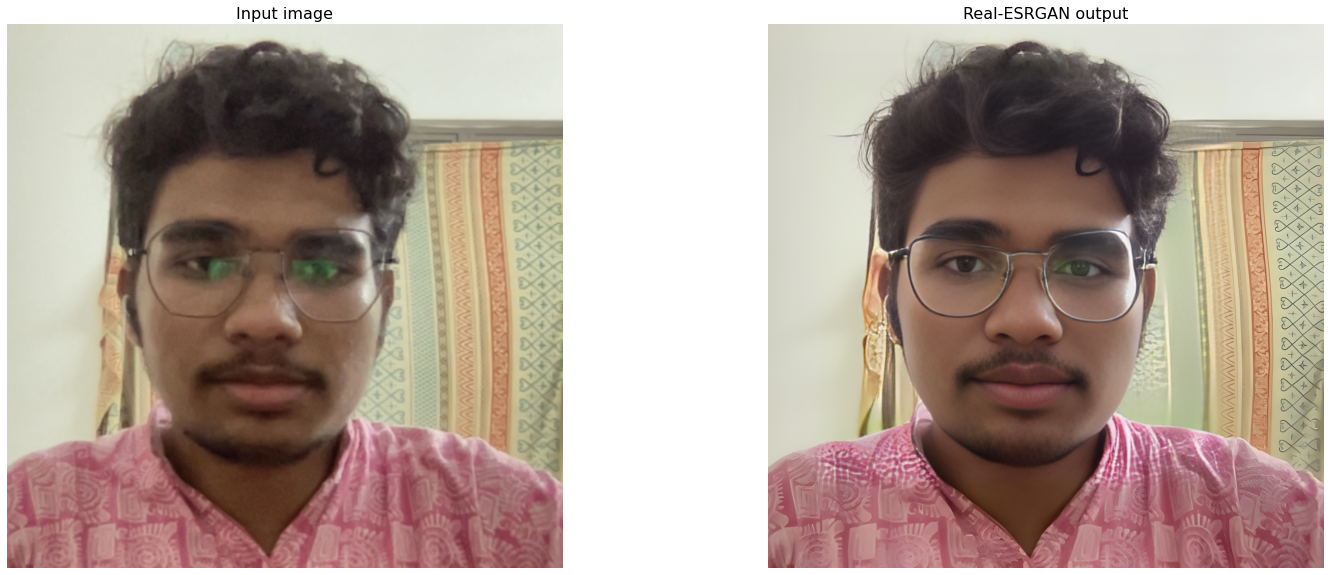

In [ ]:
#@markdown # **4) Compare before ESRGAN and after ESRGAN image** (Optional. You can skip this block if you want to)
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'Real-ESRGAN/upload'
result_folder = 'Real-ESRGAN/results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

In [ ]:
#@markdown # **5) Download Super Enhanced Image**

from google.colab import files

filename= os.listdir('/content/Real-ESRGAN/results')
files.download('/content/Real-ESRGAN/results/'+filename[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>